# 1. 목표
- Iris(붓꽃)의 꽃잎 길이, 꽃잎 너비, 꽃받침 길이, 꽃받침 너비 특성들을 활용하여 3가지 품종으로 분류
- KNN 모델의 이웃(k) 숫자를 조절해보자 (hyper parameter tuning)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris                 # iris 데이터셋을 불러오기 위함
from sklearn.model_selection import train_test_split   # train, test 데이터를 자동으로 분류
from sklearn.neighbors import KNeighborsClassifier     # KNN 모델
from sklearn import metrics                            # 모델 평가 지표

# 2. 데이터 수집
- 학습용으로 제작된 iris 데이터를 로드

In [3]:
Iris_data = load_iris()
Iris_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

# 3. 데이터 전처리
- 학습용으로 만들어진 데이터이기 때문에 전처리는 필요하지 않음

# 4. 탐색적 데이터 분석
- 데이터 구조를 확인해보자

In [ ]:
# data : 문제 데이터
# target : 정답 데이터
# target_names : 정답 데이터명
# feature_names: 컬럼명
# DESCR : 데이터셋에 대한 설명
# filename: 파일 경로 및 이름

In [5]:
Iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

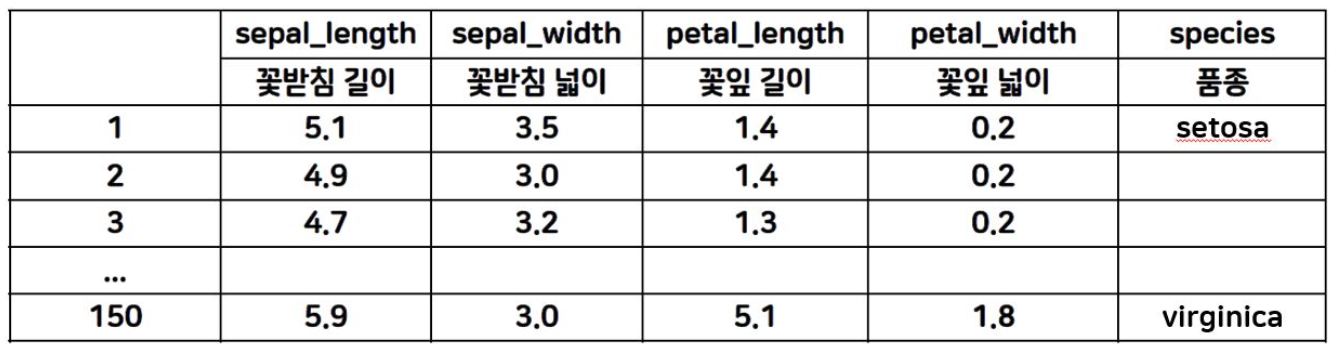

In [15]:
Iris_data['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [22]:
Iris_data["target"]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [23]:
print(Iris_data["data"].shape)
print(Iris_data["target"].shape)

(150, 4)
(150,)


In [24]:
Iris_data["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [25]:
Iris_data["target_names"][0]

'setosa'

In [26]:
Iris_data["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [28]:
print(Iris_data["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

- 데이터 프레임 형식으로 문제 데이터를 변환 (컬럼명을 feature_names로 삽입)
- 문제(X)와 정답(y)으로 분리

In [33]:
X = pd.DataFrame(Iris_data["data"],
                columns = Iris_data["feature_names"])

X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [37]:
y = Iris_data["target"] # 시리즈라 굳이 df 처리 안해도 됌

y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

- 자동으로 학습데이터, 평가데이터 (7:3) 분리

In [58]:
# 학습데이터, 평가 데이터를 자동 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size = 0.3, # test data 크기
                                                   random_state = 3 # 랜덤시드
                                                   )

X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
51,6.4,3.2,4.5,1.5
23,5.1,3.3,1.7,0.5
83,6.0,2.7,5.1,1.6
142,5.8,2.7,5.1,1.9
84,5.4,3.0,4.5,1.5
...,...,...,...,...
107,7.3,2.9,6.3,1.8
21,5.1,3.7,1.5,0.4
0,5.1,3.5,1.4,0.2
131,7.9,3.8,6.4,2.0


- 시각화를 해보자
- 한번에 여러 특성들을 비교할 수 있는 산점도 매트릭스를 활용해보자

array([[<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal width (c

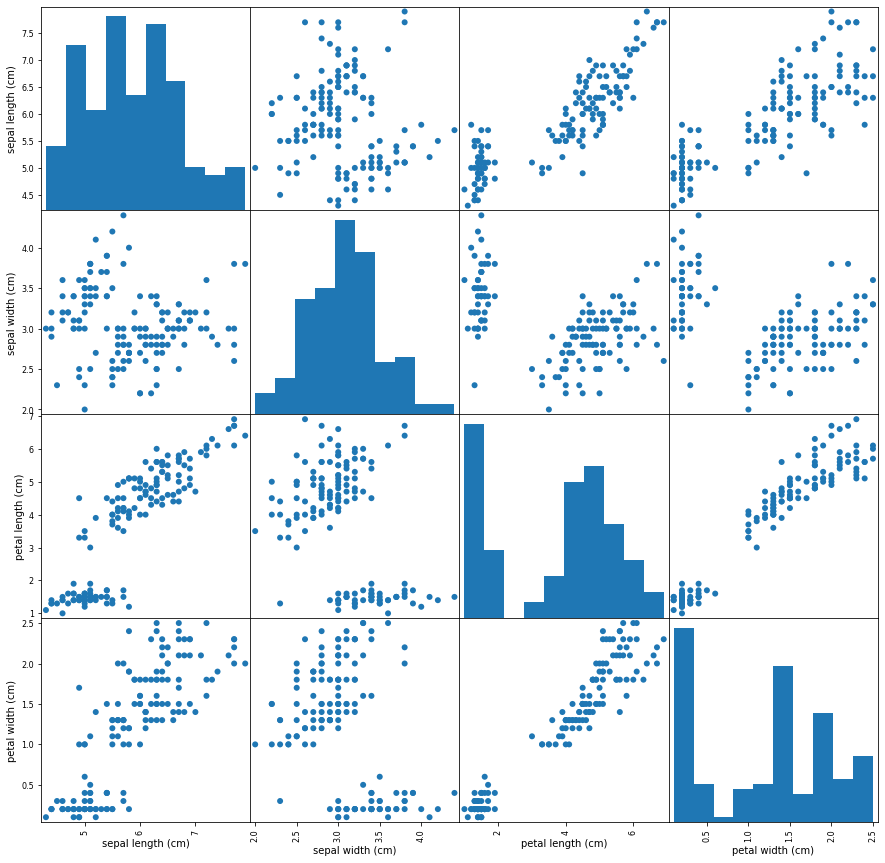

In [59]:
# iris 문제 데이터를 가지고 산점도 매트릭스 생성하기
pd.plotting.scatter_matrix(X, 
                          figsize = (15, 15),   # 매트릭스 사이즈 설정
                           # 어떤 형식으로 출력 (o : 동그라미, s: 네모, ^: 세모)
                          marker = 'o',          
                          alpha = 1             # 투명도 (1은 불투명)
                          )

# 5. 모델링 (모델선택, 학습, 평가)

In [66]:
# KNN 모델 불러오기
model = KNeighborsClassifier(n_neighbors=10)

In [67]:
# 모델 학습
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [68]:
# 평가용 문제 데이터를 넣어서 정답을 예측
pre = model.predict(X_test)

In [69]:
metrics.accuracy_score(pre, y_test)

0.9555555555555556

# 하이퍼 파라미터 튜닝하기

In [64]:
train_list = []
test_list = []

for k in range(1,100,2) :
    # 모델 생성
    m = KNeighborsClassifier(n_neighbors=k)
    # 모델 학습
    m.fit(X_train, y_train)
    # 학습한 모델로 예측
    
    # 학습데이터
    train_pre = m.predict(X_train)
    train_score = metrics.accuracy_score(train_pre, y_train)
    train_list.append(train_score)
    
    # 평가 데이터
    test_pre = m.predict(X_test)
    test_score = metrics.accuracy_score(test_pre, y_test)
    test_list.append(test_score)

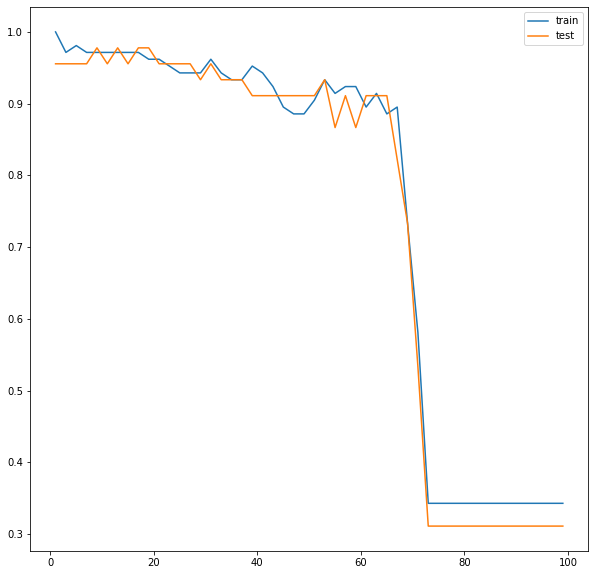

In [65]:
plt.figure(figsize=(10,10))
plt.plot(range(1,100,2), train_list, label ='train')
plt.plot(range(1,100,2), test_list, label ='test')

plt.legend()
plt.show()

# 과소 적합: 70 부근 갑자기 뚝 떨어지니까
# 과대적합 1이나 45 정도 (train, test gap 큰거)